In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [107]:
data = pd.read_csv('/content/drive/MyDrive/Datascience/disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
4,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [108]:
data.shape

(257, 14)

In [109]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
disease     0
dtype: int64

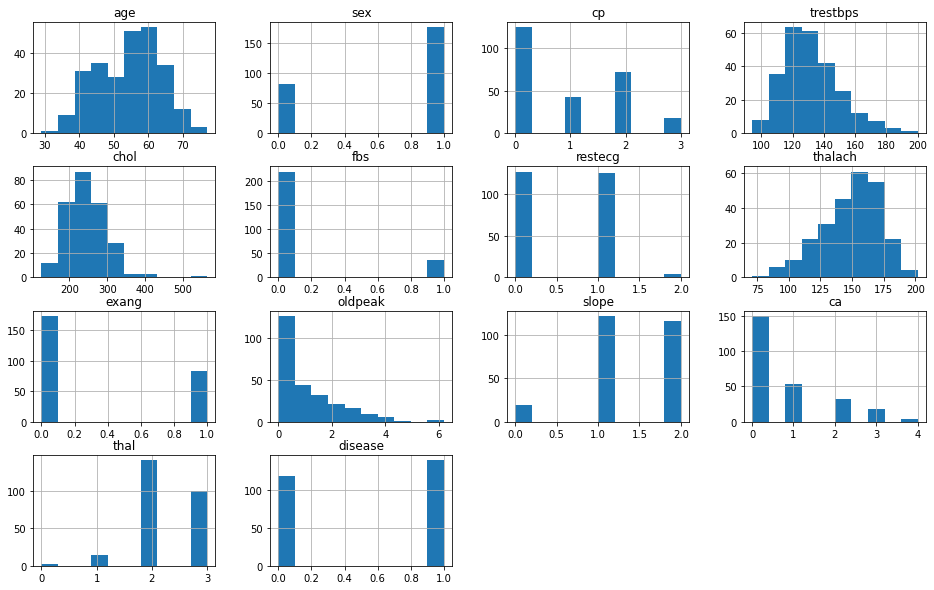

In [110]:
hist = data.hist(bins=10, figsize=(16,10))

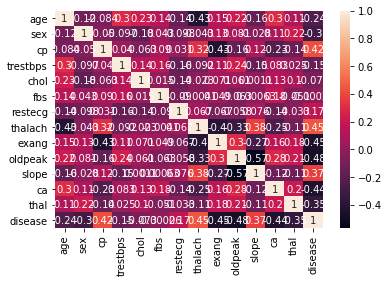

In [111]:
sns.heatmap(data.corr(), annot = True)
plt.show()

Text(0.5, 1.0, 'Histogram of disease')

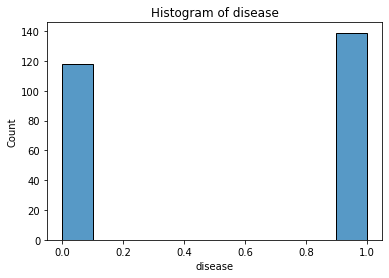

In [112]:
sns.histplot(data['disease'])
plt.title("Histogram of disease")

In [113]:
X= data.drop('disease',axis=1)
y=data['disease']

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [115]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [116]:
model = Sequential()
model.add(Dense(12, input_dim=13, kernel_initializer= 'uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                168       
_________________________________________________________________
dropout_12 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 78        
_________________________________________________________________
dropout_13 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 7         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [117]:
early_stopping_monitor=EarlyStopping(monitor='val_loss',verbose=1, patience=30, baseline=0.4, )

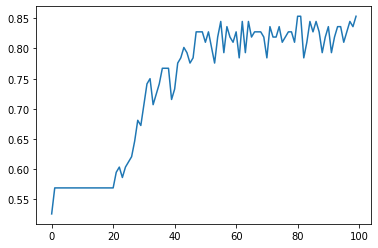

In [118]:
history=model.fit(X_train_scaled, y_train, validation_split=0.35, epochs=100, batch_size=6, verbose=0)
plt.plot(history.history['accuracy'])
plt.show()

In [119]:
score = model.evaluate(X_train, y_train)

6/6 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8156


In [120]:
y_pred = model.predict(X_test_scaled)

In [121]:
y_pred = (y_pred > 0.5)

In [122]:
y_pred

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[29 10]
 [ 6 33]]


In [124]:
score=accuracy_score(y_pred,y_test)
print("Test accuracy : ", score)

Test accuracy :  0.7948717948717948
